# Hotel Booking Demand
## 17 April 2020
#### A learning project 
#### Hani Nguyen

### Objectives
- Explore hotel booking demand
- Build a model to predict booking possibility based on the 'previous_cancellation'.

### Attributes
- Numerical: 
    - 'lead_time': Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
    - 'arrival_date_year': Year of arrival date	
    - 'arrival_date_week_number': Week number of the arrival date
    - 'arrival_date_day_of_month': Day of the month of the arrival date
    - 'stays_in_weekend_nights': Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
    - 'stays_in_week_nights': Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
    - 'adults': Number of adults	
    - 'children': Number of children	
    - 'babies': Number of babies	 
     - 'previous_cancellations': Number of previous bookings that were cancelled by the customer prior to the current booking.     
    - 'previous_bookings_not_canceled': Number of previous bookings not cancelled by the customer prior to the current booking .
     - 'booking_changes': Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. 
    - 'days_in_waiting_list': Number of days the booking was in the waiting list before it was confirmed to the customer.
    - 'adr': Average Daily Rate
    - 'required_car_parking_spaces': Number of car parking spaces required by the customer.
    - 'total_of_special_requests': Number of special requests made by the customer (e.g. twin bed or high floor).
- Categorical:  
    - 'hotel': Resort or City Hotel
    - 'is_canceled': Value indicating if the booking was canceled (1) or not (0)
    - 'arrival_date_month': Month of arrival date with 12 categories: “January” to “December”.
    - 'meal': Type of meal booked. Categories are presented in standard hospitality meal packages:
        - Undefined/SC – no meal package;
        - BB – Bed & Breakfast;
        - HB – Half board (breakfast and one other meal – usually dinner);
        - FB – Full board (breakfast, lunch and dinner)
    - 'country': Country of origin. Categories are represented in the ISO 3155–3:2013 format.
    - 'market_segment': Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - 'distribution_channel': Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
    - 'is_repeated_guest': Value indicating if the booking name was from a repeated guest (1) or not (0)
    - 'reserved_room_type': Code of room type reserved. Code is presented instead of designation for anonymity reasons.
    - 'assigned_room_type': Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. 
    - 'deposit_type': Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
        - No Deposit
        - Non Refund – a deposit was made in the value of the total stay cost;
        - Refundable – a deposit was made with a value under the total cost of stay.
    - 'agent': ID of the travel agency that made the booking
    - 'company': ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. 
    - 'customer_type': Type of booking, assuming one of four categories:
        - Contract - when the booking has an allotment or other type of contract associated to it;
        - Group – when the booking is associated to a group;
        - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
        - Transient-party – when the booking is transient, but is associated to at least other transient booking
    - 'reservation_status': Reservation last status, assuming one of three categories:
        - Canceled – booking was canceled by the customer;
        - Check-Out – customer has checked in but already departed;
        - No-Show – customer did not check-in and did inform the hotel of the reason why
- Date: 'reservation_status_date': Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel
https://www.kaggle.com/prashanthsri12/hotel-demand-eda-basic
https://www.kaggle.com/vssseel/eda-various-ml-models-and-nn-with-roc-curves
https://www.kaggle.com/unzule/hotel-booking-analysis
https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations
https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

## Step 1. Load final data

In [1]:
#import libraries
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import datetime

#machine learning libraries
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load data
df = pd.read_csv(r"Hotel_Booking_Demand_Final.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,999.0,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,999.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,999.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,999.0,999.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


##  Step 3. Explore data

####  3.1. Hotel Booking Demand Overview

####  3.1.1. Monthly and Yearly Booking

In [6]:
sns.set_palette("Pastel1")

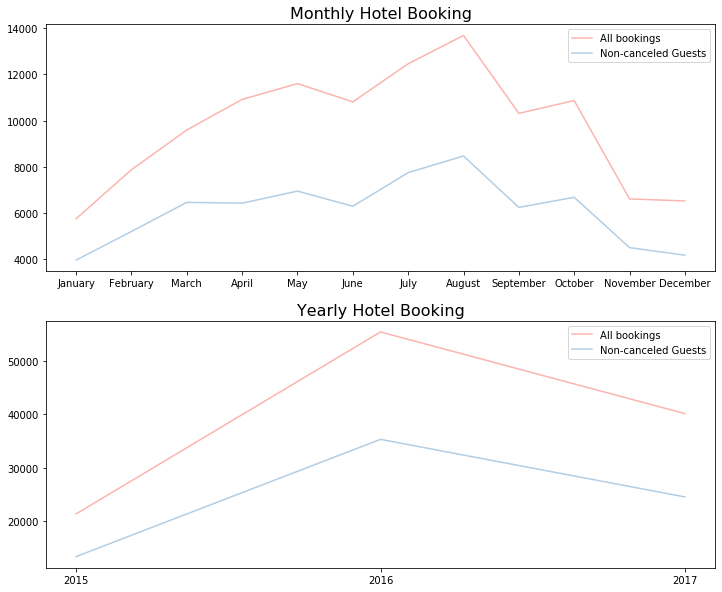

In [7]:
# monthly booking
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_booking = pd.Categorical(df["arrival_date_month"], categories=months, ordered=True)
monthly_non_canceled = pd.Categorical(df[df['is_canceled']==0]["arrival_date_month"], categories=months, ordered=True)

#yearly booking
yearly_booking = pd.Categorical(df["arrival_date_year"], categories=df['arrival_date_year'].unique(), ordered=True)
yearly_non_canceled = pd.Categorical(df[df['is_canceled']==0]["arrival_date_year"], categories=df['arrival_date_year'].unique(), ordered=True)

#plot
fig, (ax1,ax2) = plt.subplots(2,figsize =(12,10))
ax1.plot(monthly_booking.value_counts().index, monthly_booking.value_counts())
ax1.plot(monthly_non_canceled.value_counts().index, monthly_non_canceled.value_counts())
ax1.legend(['All bookings','Non-canceled Guests'])
ax1.set_title("Monthly Hotel Booking",fontsize=16)

ax2.plot(yearly_booking.value_counts().index, yearly_booking.value_counts())
ax2.plot(yearly_non_canceled.value_counts().index, yearly_non_canceled.value_counts())
ax2.legend(['All bookings','Non-canceled Guests'])
ax2.set_title("Yearly Hotel Booking",fontsize=16)
ax2.xaxis.set_ticks(df['arrival_date_year'].unique())

plt.show()

- Most busy season of the year was in Autumn (July, August). The total bookings decreased significantly in winter, and started to rise again in March. Base on this information, hotels can create different promotions suitable for different time of the year. 
- 2017 witnessed a drop in the total number of bookings.
- Non-canceled guests trend also followed the trend of the total number of bookings.

####  3.1.2. General lead time

Text(85.2, 46167.03, 'Median:71.0')

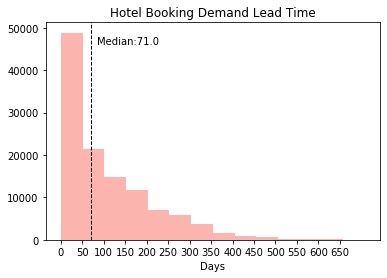

In [21]:
#lead time histogram
g = df['lead_time'].hist(bins = 14, grid=False)
g.set_xticks(range(0,700,50))
g.set_title("Hotel Booking Demand Lead Time")
g.set_xlabel("Days")

#median lead time
min_ylim, max_ylim = plt.ylim()
plt.axvline(df['lead_time'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['lead_time'].median()*1.2,max_ylim*0.9,'Median:{:.1f}'.format(df['lead_time'].median()))

- Most guests made a reservation 50 days before their arrivals.
- Since this is a right-skewed distribution, we use median to calculate the average leadtime. 

####  3.1.3. Average stay time

Text(3.3000000000000003, 44812.845, 'Median:3.0')

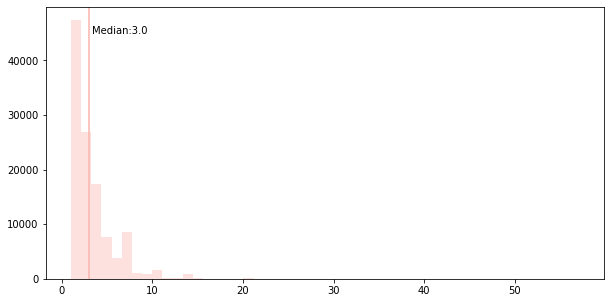

In [38]:
#number of days each guest stayed/ booked to stay
stay_days = df['stays_in_week_nights']+df['stays_in_weekend_nights']

#plot stay days histogram
plt.figure(figsize=(10,5))
sns.distplot(stay_days,kde=False)

#plot median stay days
min_ylim,max_ylim = plt.ylim()
plt.axvline(stay_days.median())
plt.text(stay_days.median()*1.1,max_ylim*0.9, 'Median:{:.1f}'.format(stay_days.median()))

- The majority of guests stayed under 10 days, with 1 being the most popular stay day. 
- Since this is a right-skewed distribution, we use median to calculate the average stay days. On average, guests stayed at hotels for 3 days. 

####  3.1.4. Country of bookings

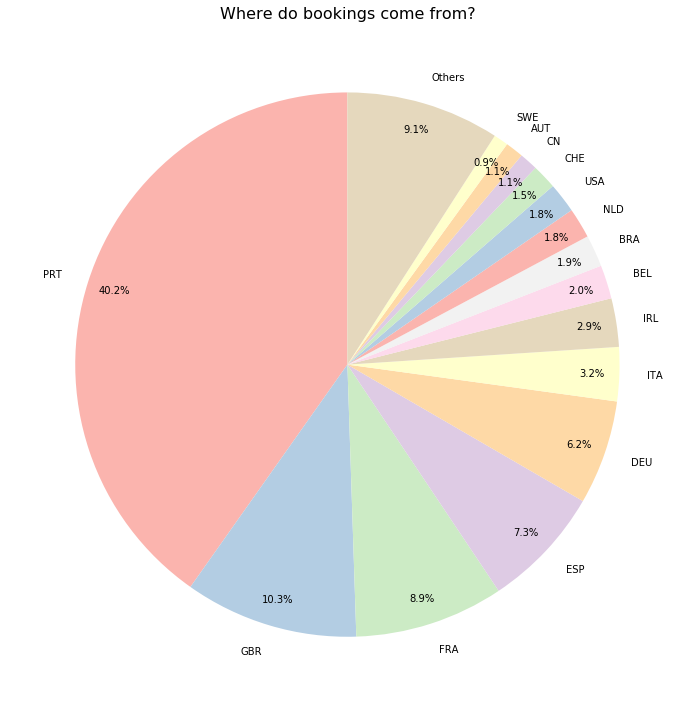

In [45]:
# Where do all bookings come from? show top 15 countries
bookings_per_country = (df.country.value_counts())/len(df) *100
bookings_per_country = bookings_per_country.to_frame().reset_index()
bookings_per_country.columns =['country','percentage']
bookings_per_country.loc[len(bookings_per_country)] = bookings_per_country['percentage'].iloc[15:,].sum()
bookings_per_country.drop(bookings_per_country.index[15:-1],inplace=True)
bookings_per_country['country'].iloc[-1] = 'Others'

#plot pie chart
fig,ax = plt.subplots(figsize=(10,10))
plt.pie(bookings_per_country['percentage'], startangle=90, autopct='%1.1f%%', labels = bookings_per_country['country'],pctdistance=0.9)
plt.title("Where do bookings come from?", fontsize = 16)
plt.tight_layout()
plt.show()

- Portugal accounted for the highest proportion of all bookings (over 40%), which was fourth times higher than the second place (Great Britain).
- Top countries were mostly from Europe. The only exemption were Brazil, USA, China and Australia.

####  3.2. What attributes affect cancellations?

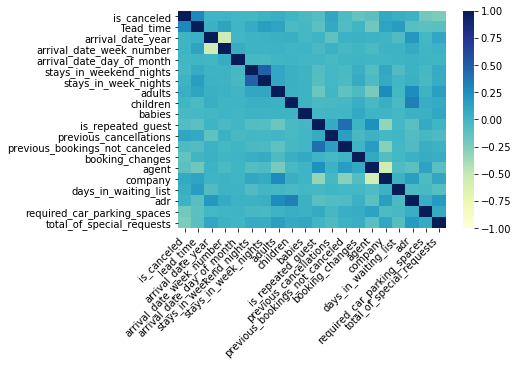

In [63]:
corr = df.corr()
g = sns.heatmap(corr,
                vmin=-1,vmax=1,center=0,
               cmap="YlGnBu")
g = g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [65]:
corr['is_canceled'].sort_values()

total_of_special_requests        -0.238318
required_car_parking_spaces      -0.196782
booking_changes                  -0.145136
agent                            -0.113643
is_repeated_guest                -0.074938
previous_bookings_not_canceled   -0.052884
babies                           -0.032491
stays_in_weekend_nights          -0.008026
arrival_date_day_of_month        -0.006375
children                          0.004118
arrival_date_week_number          0.008925
arrival_date_year                 0.013824
stays_in_week_nights              0.017780
adr                               0.028869
days_in_waiting_list              0.053937
adults                            0.054556
company                           0.092846
previous_cancellations            0.110446
lead_time                         0.289258
is_canceled                       1.000000
Name: is_canceled, dtype: float64

####  3.2. Resort Hotel vs. City Hotel

In [ ]:
#TOTAL BOOKINGS IN EACH HOTEL
resort = df[df.hotel=='Resort Hotel']
city = df[df.hotel=='City Hotel']
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_booking_resort = pd.Categorical(resort['arrival_date_month'], categories=months, ordered=True)
monthly_booking_city = pd.Categorical(city['arrival_date_month'], categories=months, ordered=True)

#plot
plt.figure(figsize=(12,5))
plt.plot(months,monthly_booking_city.value_counts(),label = "City Hotel")
plt.plot(months,monthly_booking_resort.value_counts(),label = 'Resort Hotel')
plt.title("Total bookings in each hotel")
plt.legend()

- The booking trend also followed the total booking trend shown above.
- City Hotel had double the number of bookings than Resort Hotel

In [ ]:
#MONTHLY AVERAGE PRICE PER PEOPLE PER NIGHT BY HOTEL

#average price per people (babies do not count)
df['adr_pp'] = df['adr']/df['adults']+df['children']
adr_pp_hotel_monthly = df[df.is_canceled==0][['hotel','arrival_date_month','adr_pp']].sort_values('arrival_date_month')

#order by month
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
adr_pp_hotel_monthly["arrival_date_month"] = pd.Categorical(adr_pp_hotel_monthly["arrival_date_month"], categories=months, ordered=True)
adr_pp_hotel_monthly["hotel"] = pd.Categorical(adr_pp_hotel_monthly["hotel"], categories=['City Hotel','Resort Hotel'], ordered=True)

#box plot
plt.figure(figsize = (20,8))
sns.boxplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=adr_pp_hotel_monthly)
plt.title("Monthly Average Price Per Non-canceled Guest Per Night By Hotel", fontsize=16)
plt.xlabel('')
plt.ylabel("Average Price", fontsize = 14)
plt.show()

- Overall, City Hotel had higher average price than Resort Hotel. However, in July and August, Resort Hotel's price was higher. 
- City Hotel's price seemed to hold steady through out the year. Meanwhile, Resort Hotel saw a fluctuation in price, with July and August's price being double the rest.

#### 3.2. Where does non-canceled guests come from?

In [ ]:
# Where do they come from? show top 15 countries
non_canceled = df[df.is_canceled==0]
total_guests = len(non_canceled)
guest_per_country = (non_canceled.country.value_counts())/total_guests *100
guest_per_country = guest_per_country.to_frame().reset_index()
guest_per_country.columns =['country','percentage']
guest_per_country.loc[len(guest_per_country)] = guest_per_country['percentage'].iloc[15:,].sum()
guest_per_country.drop(guest_per_country.index[15:-1],inplace=True)
guest_per_country['country'].iloc[-1] = 'Others'
guest_per_country

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
plt.pie(guest_per_country['percentage'], startangle=90, autopct='%1.1f%%', labels = guest_per_country['country'],pctdistance=0.9)
plt.title("Where does non-canceled guests come from?", fontsize = 16)
plt.tight_layout()
plt.show()

#### 3.3. Average price per non-canceled guest

In [ ]:
#average price by hotel and room type
adr_pp_hotel_room = df[df.is_canceled==0][['hotel','reserved_room_type','adr_pp']].sort_values('hotel')
adr_pp_hotel_room

#box plot
plt.figure(figsize=(15,8))
sns.boxplot(data = adr_pp_hotel_room,
           x = "reserved_room_type",
           y = "adr_pp",
           hue = 'hotel')
plt.title("Average Price Per Non-canceled Guest Per Night By Hotel and Room Type", fontsize = 16)
plt.xlabel("Reserved Room Type", fontsize = 14)
plt.ylabel("Average Price", fontsize = 14)
plt.show()

In [ ]:
# average price per non-canceled guest per night by market segment and distribution channel
adr_pp_mar = df[df.is_canceled==0][['market_segment','adr_pp']].sort_values('market_segment')
adr_pp_dis = df[df.is_canceled==0][['distribution_channel','adr_pp']].sort_values('distribution_channel')

#box plot
fig, (ax1,ax2) = plt.subplots(2,figsize = (15,10), sharey= True)
plt.subplots_adjust(hspace = 0.5)

sns.boxplot(x='market_segment', y= 'adr_pp', data = adr_pp_mar,ax=ax1)
sns.boxplot(x ='distribution_channel', y= 'adr_pp', data = adr_pp_dis, ax=ax2)

ax1.set_title("Average Price Per Non-canceled Guest Per Night By Market Segment", fontsize = 16)
ax2.set_title("Average Price Per Non-canceled Guest Per Night Distribution Channel", fontsize = 16)

ax1.set_ylabel("Average Price")
ax2.set_ylabel("Average Price")

ax1.set_xlabel("Market Segment")
ax2.set_xlabel("Distribution Channel")

fig.suptitle(None)
plt.show()

#### 3.4. Are non-canceled guests repeated guests?

In [ ]:
#is_canceled vs. is_repeated_guest
g = sns.catplot(x='is_repeated_guest',data=df,kind='count',col='is_canceled')

g.set_xticklabels(["No","Yes"])
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Are non-canceled guests repeated guests?")

axes=g.axes.flatten()
axes[0].set_title("Non-canceled Guests")
axes[0].set_xlabel("Not Repeated")
axes[1].set_title("Canceled Guests")
axes[1].set_xlabel("Repeated")

#### 3.4. How long do people stay at the hotels?

In [ ]:
df['length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(20,15))
g = sns.countplot(x='length_of_stay',hue='hotel',data=df)
title = g.set_title(label='How long do people stay at the hotels?',fontsize=25)
g.set_xlabel("Length of stay",fontsize=18)
g.set_ylabel("Count",fontsize=18)
legend = g.legend(loc='upper right')

#### 2.4. Label Encoder

We convert categorical text features into model-understandable numerical data using LabelEncoder. For ordinal categorical features, we will label them manually to ensure correct order. 

In [ ]:
#make a copy of the original dataset to avoid damaging the original data
df_copy = df.copy()

In [ ]:
le = LabelEncoder()

In [ ]:
#convert ordinal categorical features
df_copy['arrival_date_month'] = df_copy['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5,
                                                                   'June':6, 'July':7,'August':8, 'September':9, 'October':10, 
                                                                   'November':11, 'December':12})

In [ ]:
#nominal categorical variables
categorical = ['hotel','meal','country', 'market_segment', 'distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type', 'agent','company', 'customer_type','reservation_status']

In [ ]:
#convert categorical features
hotel = le.fit_transform(df_copy['hotel'])
meal = le.fit_transform(df_copy['meal'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])
hotel = le.fit_transform(df_copy['hotel'])

In [ ]:
df['arrival_date_month']

In [ ]:
le.fit_transform(df_cor['arrival_date_month'])

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()